# Data Mining and Machine Learning Coursework

# Part (A): Breast Cancer Mortality Prediction

## Task (1) - Domain Understanding: Classification

### Installing and importing required libraries

In [176]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [177]:
# Importing the libraries

import pandas as pd
import numpy as np
import pycaret
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

### Loading and displaying the dataset

In [179]:
# reading the data
Mort_pred = pd.read_csv(r"C:\Users\soham\OneDrive\Desktop\Datasets\Breast_Cancer_Mortality_Survival_Dataset.csv")

# displaying the first five rows of the data set
Mort_pred.head()

,Patient ID,Moth of Birth,Age,Sex,Race,Marital Status,Occupation Code,Adopted Status,T Stage,N Stage,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,A0012,12,68.0,Female,White,Married,11.0,1,T1,N1,...,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,A0013,12,50.0,Female,White,Married,11.0,0,T2,N2,...,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,A0014,11,58.0,Female,White,Divorced,9.0,0,T3,N3,...,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,A0015,3,58.0,Female,White,Married,10.0,0,T1,N1,...,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,A0016,1,47.0,Female,White,Married,12.0,0,T2,N1,...,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive


In [180]:
# Displaying a list of features

Mort_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient ID              4024 non-null   object 
 1   Moth of Birth           4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     3947 non-null   object 
 4   Race                    4024 non-null   object 
 5   Marital Status          4024 non-null   object 
 6   Occupation Code         4021 non-null   float64
 7   Adopted Status          4024 non-null   int64  
 8   T Stage                 4024 non-null   object 
 9   N Stage                 4024 non-null   object 
 10  6th Stage               4024 non-null   object 
 11  differentiate           4024 non-null   object 
 12  Grade                   4024 non-null   int64  
 13  A Stage                 4024 non-null   object 
 14  Tumor Size              4021 non-null   

### Checking for unique values in certain features

In [182]:
# Checking whether there are any other "sex" to decide whether to retain or drop said feature whilst model building

genders = Mort_pred['Sex'].unique()
print(genders)

['Female' nan]


According to the above codeblock, we can determine that there's no other "sex" other than "Female". We can drop the column as retaining it won't make a difference in the final model.

In [184]:
# Checking for unique values in the "Race" feature

races = Mort_pred['Race'].unique()
print(races)

['White' 'Black' 'Other']


In [185]:
# Checking for unique values in the "Occupation" feature

jobs = Mort_pred['Occupation Code'].unique()
print(jobs)

[11.  9. 10. 12.  6. 16.  7. 15.  3.  4.  2. 13. 14.  8.  5.  1. nan]


In [186]:
# Checking for a female's adoption status

family = Mort_pred['Adopted Status'].unique()
print(family)

[1 0]


In [187]:
# Checking the values for the "6th stage" of the BI-RADs feature

BIRADS = Mort_pred['6th Stage'].unique()
print(BIRADS)

['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']


In [188]:
# Checking for unique values for the "Differentiated" feature

Differentiated = Mort_pred['differentiate'].unique()
print(Differentiated)

['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']


In [189]:
# Checking for unique values in the "Grade" feature

grades = Mort_pred['Grade'].unique()
print(grades)

[3 2 1 4]


### Dropping the unnecessary features before building the model

In [191]:
# Making a copy of the data set
Mort_prediction = Mort_pred
# Note: We will be working on the copy of the data set henceforth

In [192]:
# Renaming the column names to fix further inconsistencies

Mort_prediction.rename(columns={'Moth of Birth': 'Month of Birth'}, inplace=True)
Mort_prediction.rename(columns={'Patient ID ': 'Patient ID'}, inplace=True)
Mort_prediction.head()

,Patient ID,Month of Birth,Age,Sex,Race,Marital Status,Occupation Code,Adopted Status,T Stage,N Stage,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,A0012,12,68.0,Female,White,Married,11.0,1,T1,N1,...,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,A0013,12,50.0,Female,White,Married,11.0,0,T2,N2,...,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,A0014,11,58.0,Female,White,Divorced,9.0,0,T3,N3,...,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,A0015,3,58.0,Female,White,Married,10.0,0,T1,N1,...,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,A0016,1,47.0,Female,White,Married,12.0,0,T2,N1,...,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive


In [193]:
# Creating an array of all the columns to be dropped
columns_to_be_dropped = ['Patient ID','Month of Birth','Sex','Occupation Code','Survival Months']

# Removing the features from the data set
Mort_prediction = Mort_prediction.drop(columns=columns_to_be_dropped)

In [194]:
# Checking column names from the data set

print(Mort_prediction.columns)

Index(['Age', 'Race', 'Marital Status', 'Adopted Status', 'T Stage ',
       'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Mortality_Status'],
      dtype='object')


### Generating more information about the given Data set (Task (2))

In [196]:
# Gathering numerical data from the data set

Mort_prediction.describe()

,Age,Adopted Status,Grade,Tumor Size
count,4015.000000,4024.000000,4024.000000,4021.000000
mean,54.094396,0.496769,2.150596,30.419299
std,11.417118,0.500052,0.638234,21.161080
min,30.000000,0.000000,1.000000,-75.000000
25%,47.000000,0.000000,2.000000,16.000000
50%,54.000000,0.000000,2.000000,25.000000
75%,61.000000,1.000000,3.000000,38.000000
max,502.000000,1.000000,4.000000,140.000000


In [197]:
# Finding out more information about the dataset like its column names, no. of observations and data types

Mort_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Adopted Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   differentiate           4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   object 
 10  Tumor Size              4021 non-null   float64
 11  Estrogen Status         4024 non-null   object 
 12  Progesterone Status     4024 non-null   object 
 13  Regional Node Examined  4023 non-null   object 
 14  Reginol Node Positive   4024 non-null   

### Generating a basic statistical distribution of the target variable "Mortality Status"

In [199]:
# Fixing inconsistencies with the observations for the target variable "Mortality Status"

# Standardizing the text data with the first letter capitalized
Mort_prediction['Mortality_Status'] = Mort_prediction['Mortality_Status'].str.strip().str.title()

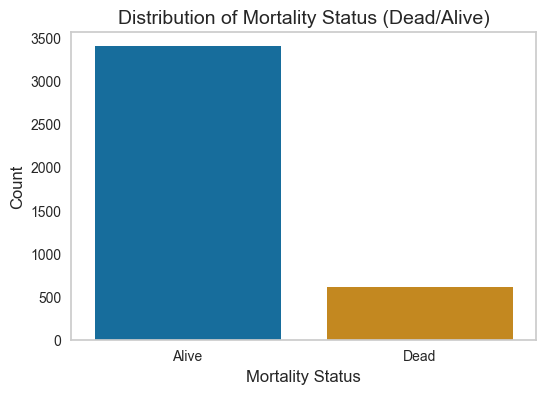

In [200]:
# Generating a histogram to show the distribution of Target feature using the "Seaborn" library

plt.figure(figsize=(6, 4))
sns.countplot(x='Mortality_Status', data=Mort_prediction, palette='colorblind')

# Adding title and labels
plt.title('Distribution of Mortality Status (Dead/Alive)', fontsize=14)
plt.xlabel('Mortality Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()

### Task (3) - Data Preparation

#### Handling Missing Values

In [203]:
# Checking the data for any missing values

missing_values = Mort_prediction.isnull().sum()
missing_values

Age                       9
Race                      0
Marital Status            0
Adopted Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                3
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    1
Reginol Node Positive     0
Mortality_Status          4
dtype: int64

In [204]:
# finding out the percentage of missing data in each column

missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.223658
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.074553
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.024851
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

In [205]:
# Handling missing data in "Age" column using Median imputation

from sklearn.impute import SimpleImputer

# Performing Median imputation
columns_to_impute_median = ['Age', 'Tumor Size']

# Initializing SimpleImputer using 'median'
imputer = SimpleImputer(strategy='median')

# Transforming only the "Age" and "Tumor Size" columns
Mort_prediction[columns_to_impute_median] = imputer.fit_transform(Mort_prediction[columns_to_impute_median])

In [206]:
# Checking for the NaN values post-imputation
missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.000000
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.024851
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

In [207]:
# Converting the "Regional Node Examined" feature from Object to Numeric to fix further inconsistencies

Mort_prediction['Regional Node Examined'] = pd.to_numeric(Mort_prediction['Regional Node Examined'], errors='coerce')
Mort_prediction.info()           # To check data types after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Adopted Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   differentiate           4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   object 
 10  Tumor Size              4024 non-null   float64
 11  Estrogen Status         4024 non-null   object 
 12  Progesterone Status     4024 non-null   object 
 13  Regional Node Examined  4022 non-null   float64
 14  Reginol Node Positive   4024 non-null   

In [208]:
# Checking for NaN values after type conversion to ensure that more NaN hasn't been imputed

missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.000000
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.049702
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

The percentage of missing values has gone up by around 3%, hence there were inconsistencies in the feature. Now we fill the missing data using simple imputation methods

In [210]:
# Handling missing data in the "Regional Node Examined" feature using Mean imputation

from sklearn.impute import SimpleImputer

# Performing Median imputation
columns_to_impute_mean = ['Regional Node Examined']

# Initializing SimpleImputer using 'mean'
imputer = SimpleImputer(strategy='mean')

# Transforming only the "Regional Node Examined" column
Mort_prediction[columns_to_impute_mean] = imputer.fit_transform(Mort_prediction[columns_to_impute_mean])

In [211]:
# Checking for NaN values post-imputation
missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.000000
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.000000
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

In [212]:
# Handling Missing data in the target variable "Mortality_Status" using Mode imputation

# Calculate mode of the 'Mortality_Status' column
mode_value = Mort_prediction['Mortality_Status'].mode()[0]  # .mode() returns a Series, [0] to get the first mode

# Applying modal imputation only to the "Mortality_Status" column
Mort_prediction['Mortality_Status'].fillna(mode_value, inplace = True)

In [213]:
# Checking for NaN values post-imputation
missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.0
Race                      0.0
Marital Status            0.0
Adopted Status            0.0
T Stage                   0.0
N Stage                   0.0
6th Stage                 0.0
differentiate             0.0
Grade                     0.0
A Stage                   0.0
Tumor Size                0.0
Estrogen Status           0.0
Progesterone Status       0.0
Regional Node Examined    0.0
Reginol Node Positive     0.0
Mortality_Status          0.0
dtype: float64

In [214]:
# Viewing the data set

Mort_prediction.head()

,Age,Race,Marital Status,Adopted Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Mortality_Status
0,68.0,White,Married,1,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,Alive
1,50.0,White,Married,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,Alive
2,58.0,White,Divorced,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,Alive
3,58.0,White,Married,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,Alive
4,47.0,White,Married,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,Alive


#### Handling outliers

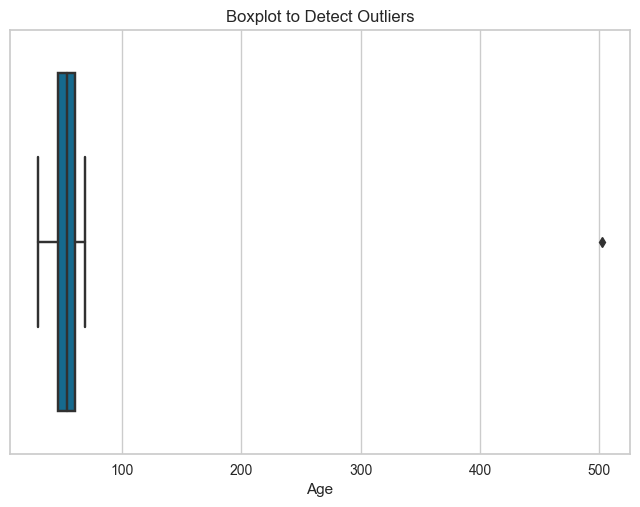

In [216]:
# Checking for outliers using a boxplot

sns.boxplot(data=Mort_prediction, x='Age')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [217]:
# Using Winsorizing / Capping method to cap the outliers within 3 standard deviations (99th percentiles)

lower_cap = Mort_prediction['Age'].quantile(0.01)
upper_cap = Mort_prediction['Age'].quantile(0.99)
Mort_prediction['Age'] = np.clip(Mort_prediction['Age'], lower_cap, upper_cap)

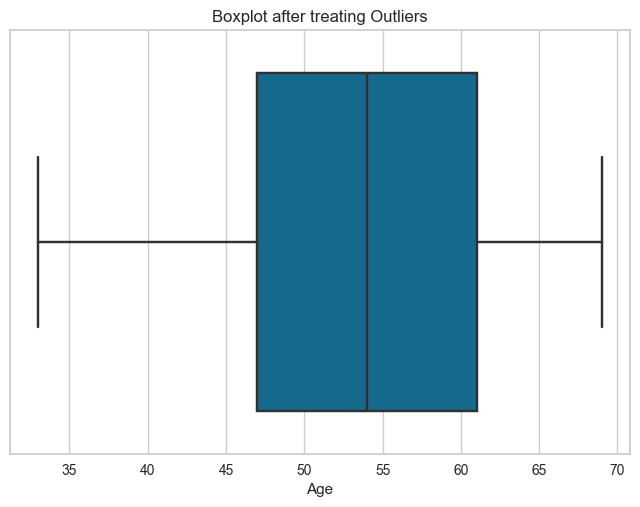

In [218]:
# Checking for outliers using a boxplot

sns.boxplot(data=Mort_prediction, x='Age')
plt.title("Boxplot after treating Outliers")
plt.show()

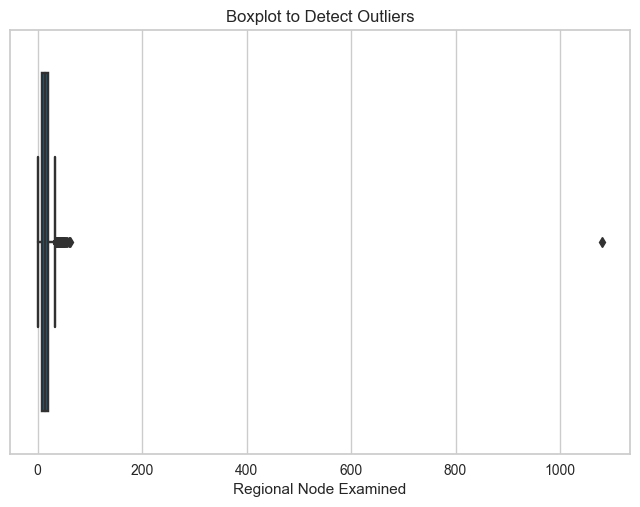

In [219]:
# Checking for outliers using a boxplot

sns.boxplot(data=Mort_prediction, x='Regional Node Examined')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [220]:
# Using Winsorizing / Capping method to cap the outliers within 2 standard deviations (95th percentile)

lower_cap = Mort_prediction['Regional Node Examined'].quantile(0.01)
upper_cap = Mort_prediction['Regional Node Examined'].quantile(0.95)
Mort_prediction['Regional Node Examined'] = np.clip(Mort_prediction['Regional Node Examined'], lower_cap, upper_cap)

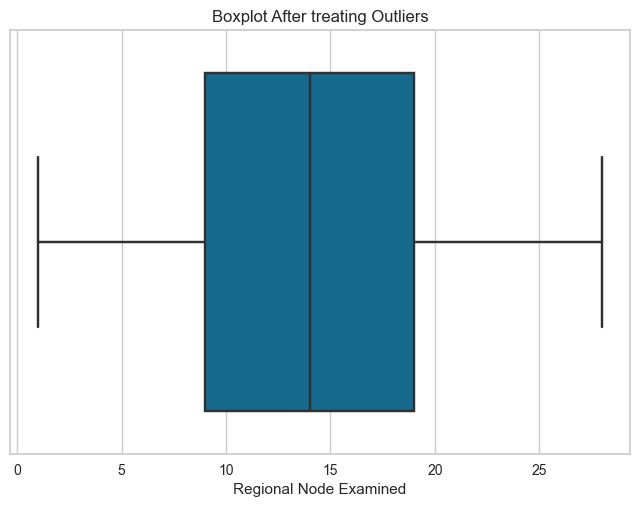

In [221]:
# Plotting a box plot to check outliers

sns.boxplot(data=Mort_prediction, x='Regional Node Examined')
plt.title("Boxplot After treating Outliers")
plt.show()

In [222]:
# Displaying the names of all columns

print(Mort_prediction.columns)

Index(['Age', 'Race', 'Marital Status', 'Adopted Status', 'T Stage ',
       'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Mortality_Status'],
      dtype='object')


In [223]:
# Renaming the column to fix inconsistencies

Mort_prediction.rename(columns={'T Stage ': 'T Stage'}, inplace=True)
Mort_prediction.rename(columns={'Reginol Node Positive': 'Regional Node Positive'}, inplace=True)

In [224]:
# Finding out the amount of unique values in each categorical column

Mort_prediction['Race'].value_counts()

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64

In [225]:
Mort_prediction['Marital Status'].value_counts()

Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

In [226]:
Mort_prediction['Adopted Status'].value_counts()

Adopted Status
0    2025
1    1999
Name: count, dtype: int64

In [227]:
Mort_prediction['T Stage'].value_counts()

T Stage
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

In [228]:
Mort_prediction['N Stage'].value_counts()

N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

In [229]:
Mort_prediction['6th Stage'].value_counts()

6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

In [230]:
Mort_prediction['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [231]:
Mort_prediction['Grade'].value_counts()

Grade
2    2351
3    1111
1     543
4      19
Name: count, dtype: int64

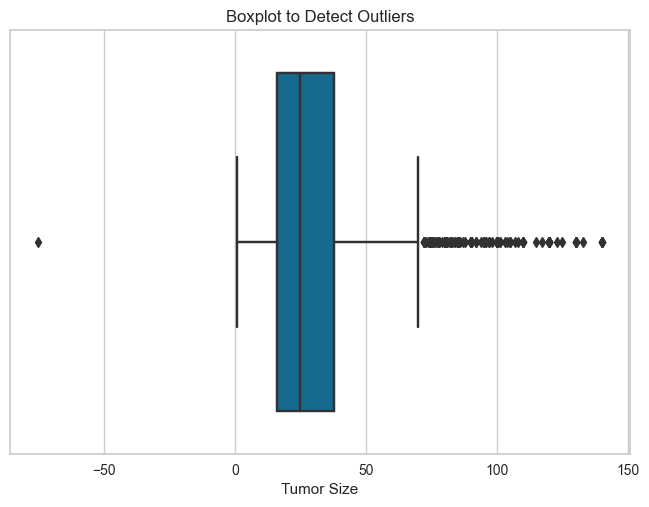

In [232]:
# Creating a boxplot to visualize outliers in the "Tumour Size" Feature

sns.boxplot(data=Mort_prediction, x='Tumor Size')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [233]:
# Finding out the percentage of outliers in the Tumor Size feature

Q1 = Mort_prediction['Tumor Size'].quantile(0.25)
Q3 = Mort_prediction['Tumor Size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_tumor_size = Mort_prediction[(Mort_prediction['Tumor Size'] < lower_bound) | (Mort_prediction['Tumor Size'] > upper_bound)]

outliers_tumor_size
outliers_tumor_size_percentage = (len(outliers_tumor_size) / len(Mort_prediction))*100
outliers_tumor_size_percentage

5.492047713717694

In [234]:
# Dealing with outliers in the "Tumor size" feature
# Calculating Z-scores
mean = Mort_prediction['Tumor Size'].mean()
STDEV = Mort_prediction['Tumor Size'].std()
Mort_prediction['Z-Score'] = (Mort_prediction['Tumor Size'] - mean) / STDEV

# Defining a threshold
threshold = 3

# Identifying the outliers
Mort_prediction['Tumor_Outliers'] = Mort_prediction['Z-Score'].apply(lambda x: 'Yes' if abs(x) > threshold else 'No')

# Capping the outliers
upper_limit = mean + 2 * STDEV
lower_limit = mean - 1 * STDEV

Mort_prediction['Tumor Size'] = np.where(Mort_prediction['Tumor Size'] > upper_limit, upper_limit,
                            np.where(Mort_prediction['Tumor Size'] < lower_limit, lower_limit, Mort_prediction['Tumor Size']))

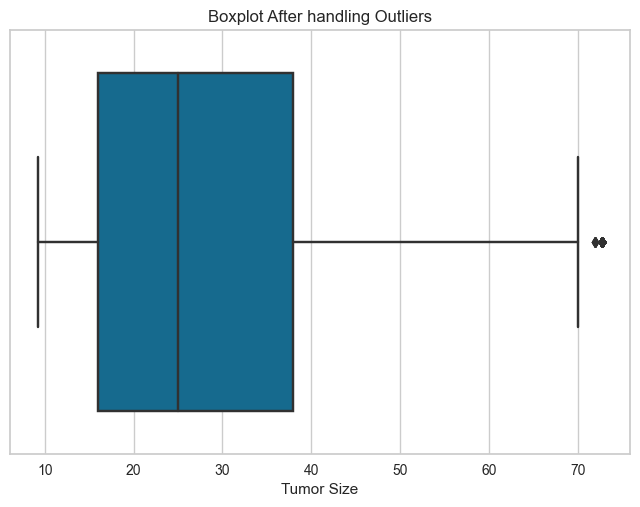

In [235]:
# Creating a boxplot to visualize outliers in the "Tumour Size" Feature

sns.boxplot(data=Mort_prediction, x='Tumor Size')
plt.title("Boxplot After handling Outliers")
plt.show()

In [236]:
Mort_prediction['A Stage'].value_counts()

A Stage
Regional    3932
Distant       92
Name: count, dtype: int64

In [237]:
Mort_prediction['Estrogen Status'].value_counts()

Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64

In [238]:
Mort_prediction['Progesterone Status'].value_counts()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64

In [239]:
Mort_prediction['Mortality_Status'].value_counts()

Mortality_Status
Alive    3408
Dead      616
Name: count, dtype: int64

### Task (4) - Model Building

#### Using the Train-Test split approach to build models -- Naive Bayes

In [340]:
# Converting Categorical Data into Numerical data to fix errors in the model
from sklearn.preprocessing import LabelEncoder

X = Mort_prediction.drop('Mortality_Status', axis=1)
y = Mort_prediction['Mortality_Status']
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply Label Encoding
encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

# Proceed with splitting and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

In [342]:
# Building a Classification model using Naive bayes

# Importing library
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split features and target

# Splitting the data into a 80:20 split where 80% is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Naive Bayes model
Naive_Bayes_model = GaussianNB()

# Training the model on the training set
Naive_Bayes_model.fit(X_train, y_train)

# Predict on test data
y_pred = Naive_Bayes_model.predict(X_test)

Accuracy: 81.74%


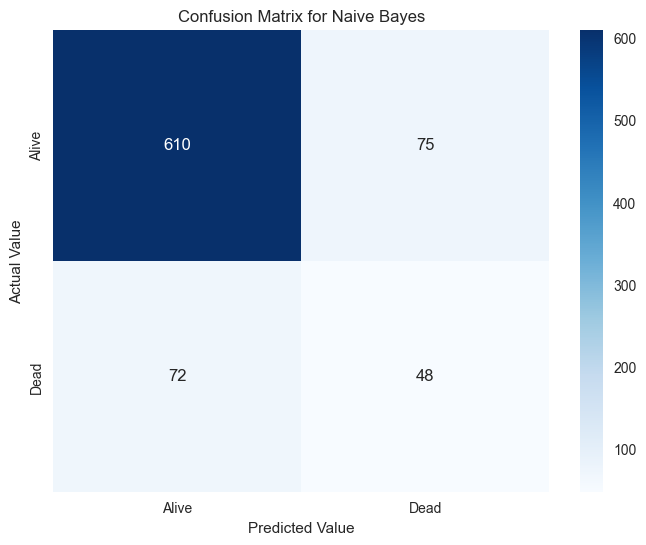

Classification Report:
              precision    recall  f1-score   support

       Alive       0.89      0.89      0.89       685
        Dead       0.39      0.40      0.40       120

    accuracy                           0.82       805
   macro avg       0.64      0.65      0.64       805
weighted avg       0.82      0.82      0.82       805



In [344]:
# Evaluating the model

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [346]:
# Finding out the learnable parameters of this model

print("Class Prior Probabilities:", Naive_Bayes_model.class_prior_)
print("Feature Means (per class):", Naive_Bayes_model.theta_)
print("Class Labels:", Naive_Bayes_model.classes_)

Class Prior Probabilities: [0.84591488 0.15408512]
Feature Means (per class): [[ 5.36088873e+01  1.77377892e+00  1.37825927e+00  4.96511201e-01
   7.38156445e-01  3.72383401e-01  1.20492104e+00  7.05471906e-01
   2.10760191e+00  9.83474109e-01  2.84991210e+01  9.50789570e-01
   8.53103195e-01  1.38672899e+01  1.19019464e+01 -6.01155577e-02
   1.50569225e-02]
 [ 5.52620968e+01  1.73185484e+00  1.46169355e+00  5.12096774e-01
   1.06048387e+00  8.42741935e-01  2.07459677e+00  6.71370968e-01
   2.38104839e+00  9.41532258e-01  3.51026302e+01  8.28629032e-01
   6.69354839e-01  1.45000000e+01  1.51310484e+01  2.85928682e-01
   2.62096774e-02]]
Class Labels: ['Alive' 'Dead']


Best Parameters: {'var_smoothing': 0.01}
Accuracy of tuned model: 81.74%


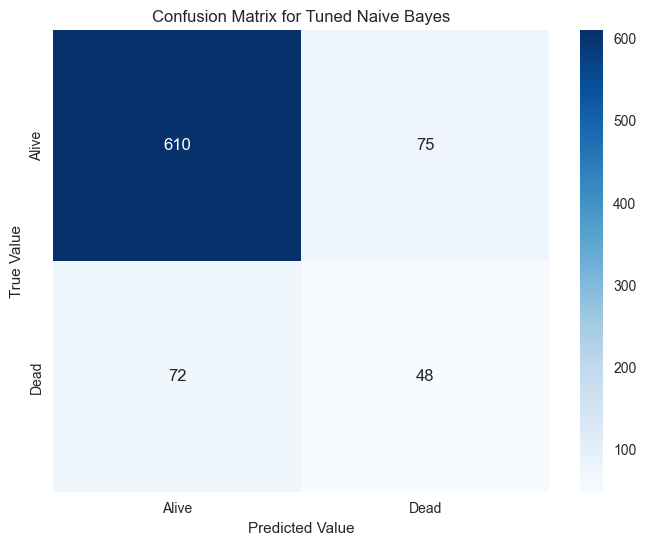

In [352]:
# Tuning and Re-Training the model using hyperparameters -- GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining the model
model = GaussianNB()

# Defining the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)

# Evaluate the accuracy of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of tuned model: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Tuned Naive Bayes')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

#### Using the Train Test split method to build models -- Logistic Regression

In [354]:
# Building a classification model using Logistic Regression

# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Converting Categorical Data into Numerical data to fix errors in the model
from sklearn.preprocessing import LabelEncoder

X = Mort_prediction.drop('Mortality_Status', axis=1)
y = Mort_prediction['Mortality_Status']

# Convert categorical features to numerical using OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg_model.predict(X_test)

Accuracy: 87.08%


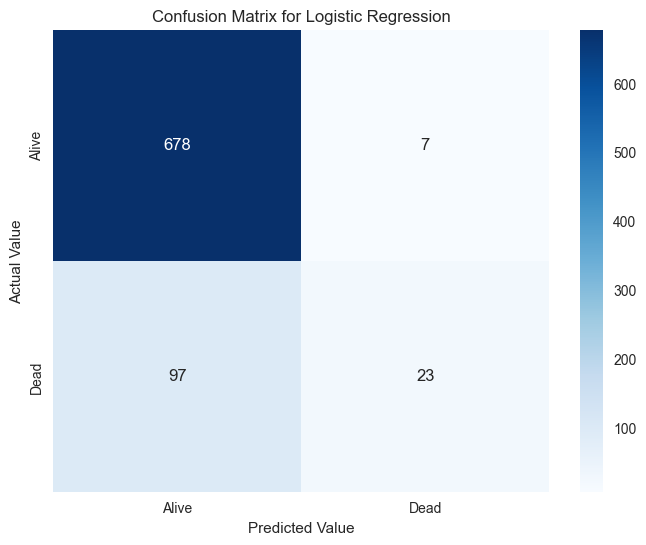

In [356]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [358]:
# Displaying its learnable parameters

print("Learnable parameters of the Logistic Regression model:")
print("Coefficients (weights):")
print(log_reg_model.coef_)  # Coefficients for each feature (Weights)
print("\nIntercept (bias):")
print(log_reg_model.intercept_)  # Intercept (Bias)

Learnable parameters of the Logistic Regression model:
Coefficients (weights):
[[ 0.02334608  0.04345367 -0.07063359 -0.00368413 -0.04079692  0.11929101
  -1.05359542 -0.45486269 -0.29208304  0.55757928 -0.08112282 -0.17564761
   0.13164158  0.46570237  0.713028    0.84228915  1.03457536  0.38295291
  -0.02613742  0.05827352  1.03457536  0.49721252  0.59859396 -0.45995122
  -0.08693631 -0.64681074 -0.64031626 -0.48245113 -1.03258951 -0.69841278
  -0.79957681 -0.8003633   0.28110228  0.43172716  0.3888977  -0.50794054
   0.53583324 -0.04948405  0.21842292 -0.07856528  1.06945351  0.23849639
   0.55224119  0.38586118 -0.44647262  0.61292556  0.15648842  0.63158834
   0.29799515  0.48194863  0.18520225 -0.12489378  0.          0.19199103
   0.06391941 -0.09883615  0.09081722 -0.07929126  0.14640106  0.12960166
   0.1973165   0.33964564  0.20190851  0.5103802   0.         -0.49884771]]

Intercept (bias):
[-1.30814333]


In [360]:
# Using GridSearchCV to find the optimal Hyperparameters to tune the model

# Define hyperparameter grid to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga'],    # Solvers that support l1 and l2
    'max_iter': [100, 200, 500]         # Maximum iterations for convergence
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_log_reg_model = grid_search.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


Accuracy of tuned model: 86.83%


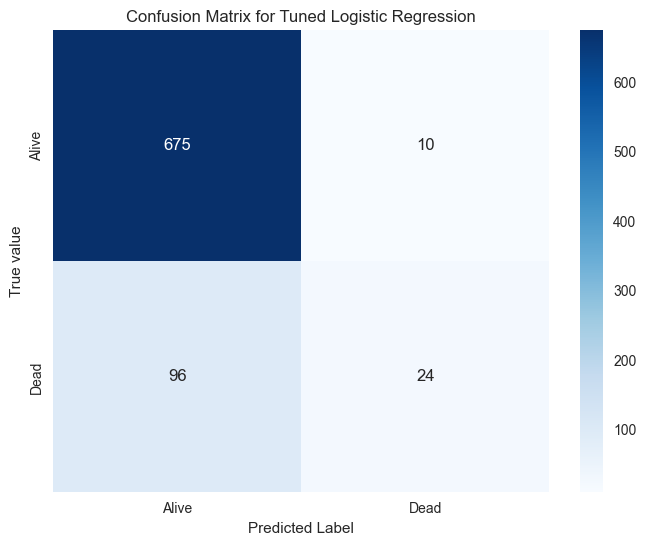

In [366]:
# Using the Hyperparameters found via GridSearchCV to tune and Re-train the model

# Train the best model on the full training data
best_log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_log_reg_model.predict(X_test)

# Evaluate the accuracy of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of tuned model: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Tuned Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True value')
plt.show()

#### Using PyCaret library to build models -- KNN